In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
mushroom_df = pd.read_csv('mushrooms.csv')

In [ ]:
mushroom_df.head(5)

In [ ]:
mushroom_df.shape

In [ ]:
mushroom_df.describe()

In [ ]:
mushroom_df.groupby(['class', 'odor']).count()

In [ ]:
labels = mushroom_df['class']
features = mushroom_df.drop(columns=['class'])

In [ ]:
labels[0:5]

In [ ]:
features[0:5]

In [27]:
labels.replace('p', 0, inplace=True)
labels.replace('e', 1, inplace=True)

In [28]:
labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [29]:
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [34]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [35]:
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)), keras.layers.Dense(20, activation=tf.nn.relu), keras.layers.Dense(2,activation='softmax')])

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [37]:
history = model.fit(features_train, labels_train, epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
163/163 [==============================] - 1s 5ms/step - loss: 0.1927 - acc: 0.9261 - val_loss: 0.0374 - val_acc: 0.9892
Epoch 2/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0173 - acc: 0.9973 - val_loss: 0.0098 - val_acc: 0.9977
Epoch 3/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9992
Epoch 4/20
163/163 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.0021 - val_acc: 0.9992
Epoch 5/20
163/163 [==============================] - 0s 3ms/step - loss: 9.4326e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 6/20
163/163 [==============================] - 0s 2ms/step - loss: 5.6879e-04 - acc: 1.0000 - val_loss: 9.6489e-04 - val_acc: 1.0000
Epoch 7/20
163/163 [==============================] - 0s 2ms/step - loss: 3.8380e-04 - acc: 1.0000 - val_loss: 7.5316e-04 - val_acc: 1.0000
Epoch 8/20
163/163 [==============================] - 0s

In [38]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

51/51 [==============================] - 0s 1ms/step - loss: 4.5571e-04 - acc: 1.0000
[0.0004557133070193231, 1.0]


In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

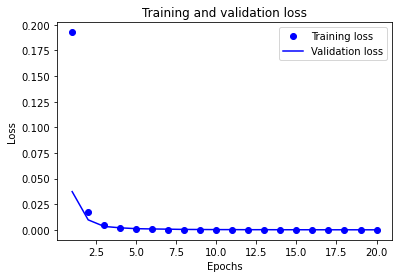

In [40]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()